In [42]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
os.listdir('/Users/my/Downloads/data')

['2020-12-03',
 '2020-12-04',
 '2020-12-05',
 '2020-12-06',
 '2020-12-07',
 '2020-12-08',
 '2020-12-09']

In [58]:
"""Reading of several files"""
path = "/Users/my/Downloads/data"
df = pd.DataFrame()

for current_path, dirs, files in os.walk(path):
    for file in files:
        data_path = f"{current_path}/{file}"
        part_df = pd.read_csv(data_path)
        path_parts = current_path.split("/")
        part_df["date"] = path_parts[-2]
        part_df["name"] = path_parts[-1]
        df = pd.concat((df, part_df))
df = df.drop(["Unnamed: 0"], axis=1)
df.reset_index(drop=True)

,product_id,quantity,date,name
0,47,1,2020-12-03,Alexey_Smirnov
1,57,1,2020-12-03,Alexey_Smirnov
2,14,2,2020-12-03,Alexey_Smirnov
3,52,1,2020-12-03,Alexey_Smirnov
4,1,4,2020-12-03,Alexey_Smirnov
...,...,...,...,...
156,66,4,2020-12-09,Rostislav_Petrov
157,39,2,2020-12-09,Rostislav_Petrov
158,82,4,2020-12-09,Vasiliy_Ivanov
159,74,2,2020-12-09,Vasiliy_Ivanov


In [22]:
per_customer_df = df.groupby("name", as_index = False).agg({"quantity": "sum"})\
    .rename(columns = {"quantity": "quantity_per_customer"})\
    .sort_values("quantity_per_customer", ascending = False)

In [23]:
max_value = per_customer_df\
    .quantity_per_customer\
    .max()

In [34]:
best_customers = per_customer_df.query("quantity_per_customer == @max_value")\
    .name\
    .sort_values()\
    .tolist()

In [48]:
best_customers_str = ", ".join(str(best_customer) for best_customer in best_customers)
best_customers_str
df.dtypes

product_id     int64
quantity       int64
date          object
name          object
dtype: object

In [43]:
"""top 10 products"""
top_10 = df.groupby("product_id", as_index = False)\
    .agg({"quantity": "sum"})\
    .sort_values("quantity", ascending = False)\
    .head(10)

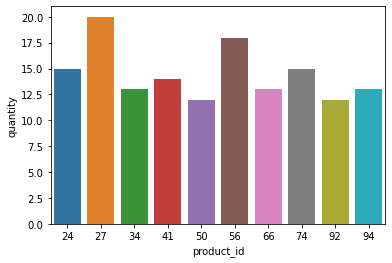

In [46]:
sns.barplot(x = 'product_id', y = "quantity", data = top_10);

In [47]:
"""product 56"""
quntity_of_product_56 = df.query("product_id == 56")\
                            .quantity\
                            .sum()

18

In [59]:
sold_per_day = df.groupby("date", as_index = False)\
                    .agg({"quantity": "sum"})

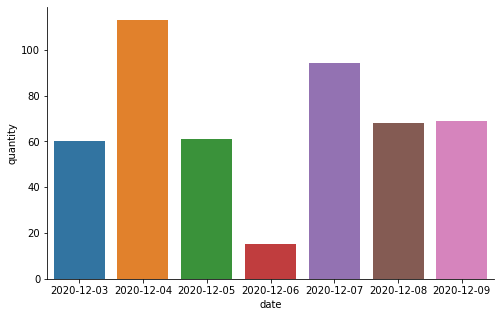

In [67]:
plt.figure(figsize = (8, 5))
sns.barplot(x = "date", y = "quantity", data = sold_per_day)
sns.despine();

In [71]:
"""пользователи, которые приобретали товары повторно"""

df.groupby(["name", "product_id"], as_index = False)\
    .agg({"date": pd.Series.nunique})\
    .rename(columns = {"date": "number_of_dates"})\
    .query("number_of_dates > 1")\
    .name\
    .tolist()

['Anton_Ivanov', 'Petr_Fedorov']